In [0]:
import keras

In [0]:
from keras.datasets import reuters

In [0]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [0]:
num_classes = max(y_train) + 1
print('# of Classes: {}'.format(num_classes))

# of Classes: 46


In [0]:
index_to_word = {}
for key, value in word_index.items():
    index_to_word[value] = key

In [0]:
index_to_word[30981]

KeyError: ignored

In [0]:
for i in x_train:
  for j in i:
    if(j == 30981):print("True")

True


In [0]:
x_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [0]:
for i in range(len(x_train)):
  word = ''
  for j in x_train[i]:
      try:
        word = word + ' ' + index_to_word[j]
      except KeyError as e:
        word = word + ''
        continue
  x_train[i] = word

In [0]:
x_train

array([' the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs',
       " the termination payment airport takes 6 visibility geological 3 6 602 begin up said fully bank expects commodity total is giant a recreation this takes leroy series termination payment airport mln a for capital 1 pre 50 american east said in council takes leroy recommend's france a but u any 4 s 1st losses pct dlrs",
       ' the lt dlrs demand 000 reuter dividend year lt plus billion 04 000 reuter dividend year an worth new vs reuter dlrs warburg on shrs earnings countries new vs reuter 1985 billion vs 2 lt 4 division 000 reuter from go 000

In [0]:
len(x_train)

8982

In [0]:
x_train[0]

' the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [0]:
labels = set(y_train)

In [0]:
labels

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45}

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def simple_tokenizer(text):
    words = word_tokenize(text)
    words = map(lambda word: word.lower(), words)
    words = [word for word in words if word not in stopWords]
    tokens = (list(map(lambda token: PorterStemmer().stem(token), words)))
    ntokens = list(filter(lambda token : charfilter.match(token),tokens))
    return ntokens

In [0]:
vec = TfidfVectorizer(tokenizer = simple_tokenizer,max_features = 1000, norm = 'l2')


In [0]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [0]:
docs_pca_train = []
docs_pca_labels = []
for i in range(len(y_train)):
      docs_pca_train.append(x_train[i])
      docs_pca_labels.append(y_train[i])

In [0]:
docs_pca_train[1]

" the termination payment airport takes 6 visibility geological 3 6 602 begin up said fully bank expects commodity total is giant a recreation this takes leroy series termination payment airport mln a for capital 1 pre 50 american east said in council takes leroy recommend's france a but u any 4 s 1st losses pct dlrs"

In [0]:
from sklearn.decomposition import PCA

In [0]:
from nltk import word_tokenize

In [0]:
import nltk

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import re

In [0]:
stopWords = stopwords.words('english')
charfilter = re.compile('[a-zA-Z]+')

In [0]:
from nltk.stem.porter import PorterStemmer

In [0]:
pca_vec = vec.fit_transform(docs_pca_train)

In [0]:
from sklearn.decomposition import PCA

In [0]:
import numpy

In [0]:
#now performing pca for 60 components
pca = PCA(46)
pca.fit(pca_vec.toarray())
docs_pca = pca.transform(pca_vec.toarray())


In [0]:
from sklearn.preprocessing.label import MultiLabelBinarizer  

In [0]:
docs_pca_labels

[3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 16,
 3,
 3,
 4,
 4,
 19,
 8,
 16,
 3,
 3,
 21,
 11,
 4,
 4,
 3,
 3,
 1,
 3,
 1,
 3,
 16,
 1,
 4,
 13,
 20,
 1,
 4,
 4,
 11,
 3,
 3,
 3,
 11,
 16,
 4,
 4,
 20,
 18,
 25,
 19,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 19,
 35,
 8,
 4,
 4,
 3,
 16,
 25,
 3,
 11,
 3,
 9,
 16,
 38,
 10,
 4,
 4,
 9,
 3,
 3,
 28,
 20,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 2,
 3,
 1,
 3,
 19,
 4,
 20,
 3,
 3,
 19,
 4,
 4,
 11,
 11,
 4,
 4,
 9,
 3,
 11,
 3,
 11,
 3,
 3,
 4,
 11,
 3,
 3,
 13,
 4,
 1,
 3,
 4,
 21,
 19,
 4,
 4,
 4,
 3,
 3,
 3,
 21,
 4,
 4,
 11,
 4,
 3,
 6,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 12,
 4,
 7,
 3,
 19,
 3,
 4,
 8,
 3,
 16,
 4,
 1,
 21,
 4,
 3,
 3,
 16,
 19,
 4,
 3,
 11,
 4,
 19,
 11,
 3,
 16,
 1,
 3,
 12,
 19,
 3,
 10,
 3,
 28,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 13,
 3,
 30,
 19,
 1,
 6,
 3,
 19,
 3,
 3,
 34,
 4,
 21,
 15,
 9,
 18,
 4,
 1,
 11,
 4,
 9,
 3,
 1,
 16,
 3,
 21,
 2,
 4,
 4,
 3,
 16,
 16,
 3,
 16,
 4,
 14,
 1,
 4,
 4,
 4,
 11,
 3,
 3,


In [0]:
labelBinarizer = MultiLabelBinarizer()
data_labels_binary = labelBinarizer.fit([y_train])
#data_labels_encode = data_labels_binary.argmax(axis = 1)
#data_labels_encode = data_labels_encode.astype(int)

In [0]:
import matplotlib.pyplot as plt

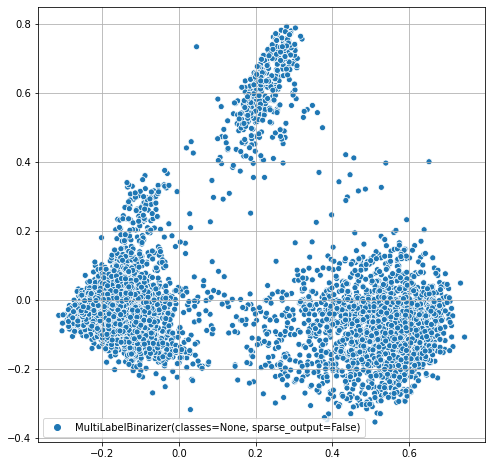

In [0]:
import seaborn as sns
plt.figure(figsize = (8, 8 ))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue =data_labels_binary)
plt.show()

In [0]:
from sklearn.cluster import KMeans
k_means = KMeans(46, max_iter =100)
clusters = k_means.fit_predict(pca_vec)

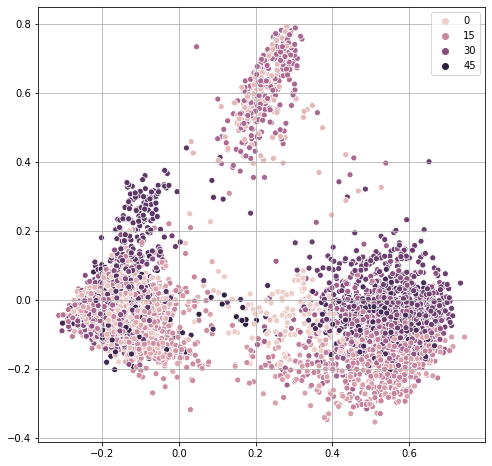

In [0]:
plt.figure(figsize = (8,8))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue = clusters)
plt.show()